In [1]:
import matplotlib.pyplot as plt
from util import *

In [3]:
flat = np.linspace(50, 100, num=10000)

# create estimate
tdc = Estimate(name="H0LiCOW", mean=73.3, std=1.75)
planck = Estimate(name="Planck", mean=67.4, std=0.5)
des = Estimate(name="DES+BAO+BBN", mean=67.4, std=1.15)#from https://ui.adsabs.harvard.edu/abs/2018MNRAS.480.3879A/abstract
boss = Estimate(name="BOSS+BAO+BBN", mean=68.6, std=1.1)#update from https://arxiv.org/pdf/2002.04035.pdf


shoes = Estimate(name="SH0ES", mean=74.03, std=1.42)
cchp = Estimate(name="CCHP", mean=69.8, std=1.9)
miras = Estimate(name="MIRAS", mean=73.6, std=3.9)
masers = Estimate(name="MCP", mean=73.9, std=3.0) #update from https://arxiv.org/pdf/2001.09213.pdf
sbf_cepheids = Estimate(name="SBF", mean=76.5, std=4.0)
sbf_trgb = Estimate(name="SBF-TRGB", mean=76.1, std=6.6)

# combine estimates
local_ceph = combine_estimates([tdc, shoes, masers, sbf_trgb], flat)
local_ceph.name = "with Cepheids"
local_trgb = combine_estimates([tdc, cchp, masers, sbf_cepheids], flat)
local_trgb.name = "with TRGB"
local_miras = combine_estimates([tdc, miras, masers, sbf_cepheids], flat)
local_miras.name = "with MIRAS"
local_all = combine_estimates([tdc, shoes, cchp, miras, masers, sbf_cepheids], flat)
local_all.name = "combining all"


# compute the tension wrt Planck
tension_local_ceph = compute_tension(planck, local_ceph)
tension_local_trgb = compute_tension(planck, local_trgb)
tension_local_miras = compute_tension(planck, local_miras)
tension_local_all = compute_tension(planck, local_all)

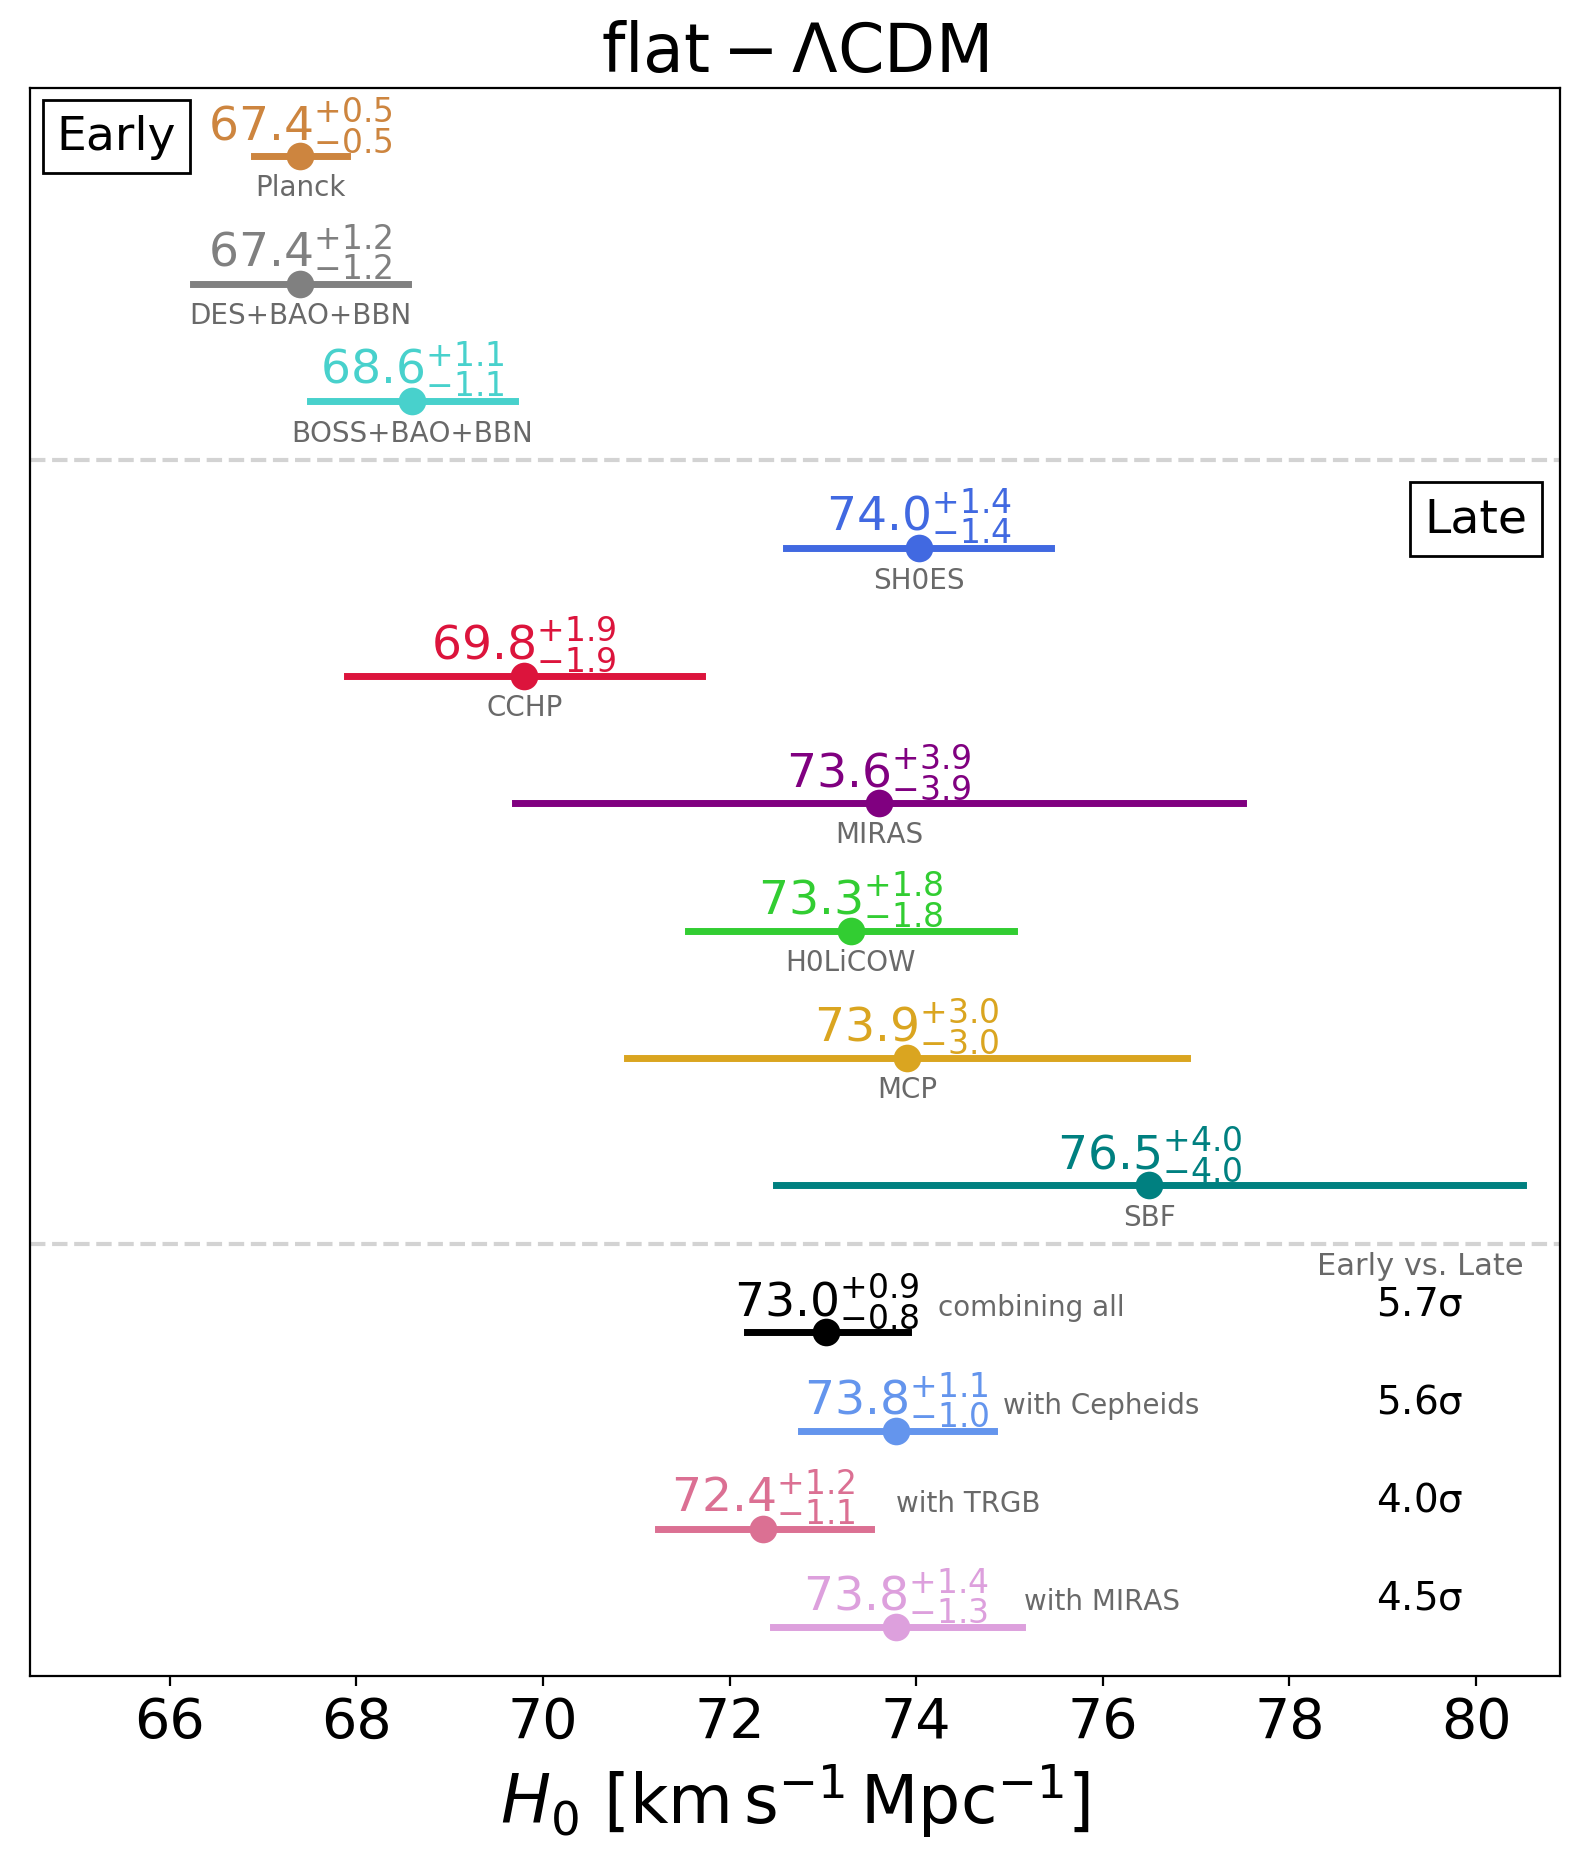

In [11]:
# Special fine-tuned design, adapted for Verde, Treu and Riess 2019

plt.figure(figsize=(8.0, 9.4), dpi=200)
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.20, top=0.92)

ax = plt.subplot(1, 1, 1)
plt.xlabel(r"$H_0\rm{\ [km\,s^{-1}\,Mpc^{-1}]}$", fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)

xs = [planck, des, boss, shoes, cchp, miras, tdc, masers, sbf_cepheids, local_all, local_ceph, local_trgb, local_miras]
ys = [16.0, 14.7, 13.5, 12.0, 10.7, 9.4, 8.1, 6.8, 5.5, 4, 3, 2, 1]

colors = ['peru', 'grey','mediumturquoise', 'royalblue', 'crimson', 'purple', 'limegreen',
          'goldenrod', 'teal', 'black', 'cornflowerblue',  'palevioletred', 'plum']

plt.axis([64.5, 80.9, 0.5, 16.7]) # 75.6
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.title(r'$\rm{flat-\Lambda CDM}$', fontsize=24)

for x, y, c in zip(xs, ys, colors):
    pcs = x.getpcs()
    plt.scatter(pcs[1], y, s=80, edgecolor=c, c=c, label=x.name)
    plt.plot([pcs[0], pcs[2]], [y, y], linewidth=2.5, color=c)

    if x.name not in ['combining all', 'with Cepheids', 'with TRGB', 'with MIRAS']:
        delaytext = r"$%.1f^{+%.1f}_{-%.1f}$" % (pcs[1], pcs[2]-pcs[1], pcs[1]-pcs[0])
        plt.annotate(delaytext, xy=(pcs[1], y + 0.18), color = c, horizontalalignment="center", fontsize=17)
        plt.annotate(x.name, xy=(pcs[1], y-0.4), color = "dimgrey", horizontalalignment="center", fontsize=10)        

    else:
        delaytext = r"$%.1f^{+%.1f}_{-%.1f}$" % (pcs[1], pcs[2]-pcs[1], pcs[1]-pcs[0])
        plt.annotate(delaytext, xy=(pcs[1], y + 0.18), color = c, horizontalalignment="center", fontsize=17)
        plt.annotate(x.name, xy=(pcs[1]+ 2.2, y + 0.18), color = "dimgrey", horizontalalignment="center", fontsize=10)           

# dashed lines to split early, late and combinations
plt.axhline(12.9, color="darkgrey", ls='--', alpha=0.5)
plt.axhline(4.9, color="darkgrey", ls='--', alpha=0.5)

# subpanels labels
bbox_props = dict(boxstyle="square", lw=1,  fc="white")
plt.annotate("Early", xy=(66.07, 16.2), color = "black", 
             horizontalalignment="right", verticalalignment="center", fontsize=17, bbox=bbox_props)
plt.annotate("Late", xy=(80.55, 12.3), color = "black", 
             horizontalalignment="right", verticalalignment="center", fontsize=17, bbox=bbox_props)


# printing the tension with Planck
xpos = 79.4
plt.annotate("Early vs. Late", xy=(xpos, 4.6), color = "dimgrey", 
             horizontalalignment="center", fontsize=11)

plt.annotate(r"$\rm{%.1f\sigma}$" % tension_local_all, xy=(xpos, 4.18), color = "black", 
             horizontalalignment="center", fontsize=14)
plt.annotate(r"$\rm{%.1f\sigma}$" % tension_local_ceph, xy=(xpos, 3.18), color = "black", 
             horizontalalignment="center", fontsize=14)
plt.annotate(r"$\rm{%.1f\sigma}$" % tension_local_trgb, xy=(xpos, 2.18), color = "black", 
             horizontalalignment="center", fontsize=14)
plt.annotate(r"$\rm{%.1f\sigma}$" % tension_local_miras, xy=(xpos, 1.18), color = "black", 
             horizontalalignment="center", fontsize=14)

plt.tight_layout()
plt.savefig('H0_tension.pdf', dpi=200)
plt.savefig('H0_tension.png', dpi=200)
